In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from ml_logic.preprocessing import preprocessing_1_hour, preprocessing_24_hour
from ml_logic.model import model_h1, model_h24

In [2]:
data = pd.read_csv("raw_data/training_v2.csv")
X_24, y_24 = preprocessing_24_hour(data)
X_1, y_1 = preprocessing_1_hour(data)

/Users/dominiknaumann/code/DomNau1001/Risk_ICU/ml_logic/preprocessing.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_cats[ohe.get_feature_names_out()] = ohe.transform(X_post_cats[["gender"]])
/Users/dominiknaumann/code/DomNau1001/Risk_ICU/ml_logic/preprocessing.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post_cats.drop(columns = "gender", inplace = True)
/Users/dominiknaumann/code/DomNau1001/Risk_ICU/ml_logic/preprocessing.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [3]:
model_24, auc_24, recall_24, X_test_24, y_test_24 = model_h24(X_24, y_24)
model_1, auc_1, recall_1, X_test_1, y_test_1 = model_h1(X_1, y_1)

/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packa

In [4]:
recall_1

0.6736842105263158

In [5]:
recall_24

0.7993527508090615

In [9]:
X_test_1["proba_alive"], X_test_1["proba_dead"] = cross_val_predict(model_1, X_test_1, np.ravel(y_test_1), cv = 5, method = "predict_proba").T
X_test_24["proba_alive"], X_test_24["proba_dead"] = cross_val_predict(model_24, X_test_24, np.ravel(y_test_24), cv = 5, method = "predict_proba").T

/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/dominiknaumann/.pyenv/versions/3.10.6/envs/Risk_ICU/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py

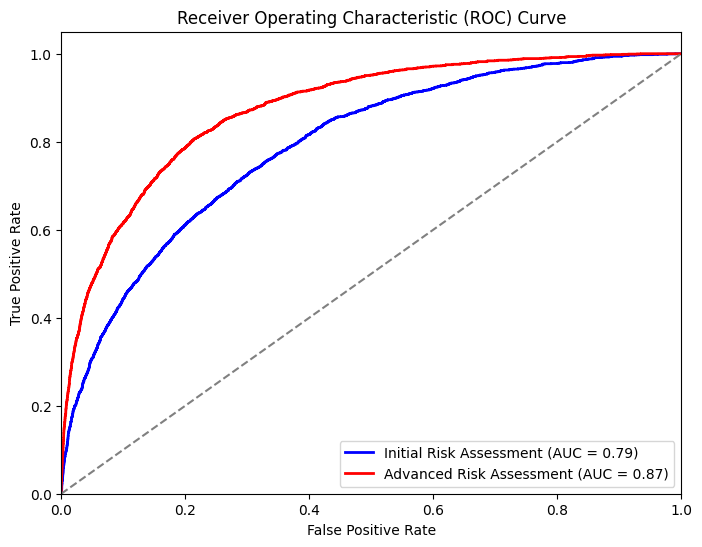

In [14]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_1, X_test_1["proba_dead"])
auc_score_1 = roc_auc_score(y_test_1, X_test_1["proba_dead"])

fpr_24, tpr_24, thresholds_24 = roc_curve(y_test_24, X_test_24["proba_dead"])
auc_score_24 = roc_auc_score(y_test_24, X_test_24["proba_dead"])


plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label='Initial Risk Assessment (AUC = %0.2f)' % auc_score_1)
plt.plot(fpr_24, tpr_24, color='red', lw=2, label='Advanced Risk Assessment (AUC = %0.2f)' % auc_score_24)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()